# Are High Risk Bets Worth it?
##### To find out if high-risk bets are worth it, I dove into a dataset of 100,000 bets spanning across various sports 

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [52]:
df = pd.read_csv("bets.csv", sep=";")

#### This dataset includes records of a unique `bet_id`, the `user_id` of the bettor, the `bet_type` (single or multiple), the `sport`, the `odds`, whether the bet won (`is_win`), the `stake` wagered, the `gain` (payout if won, 0 if lost), and the `GGR` (Gross Gaming Revenue, the bookmaker’s profit)

In [53]:
df.head()

,bet_id,user_id,bet_type,sport,odds,is_win,stake,gain,GGR
0,bet_00001,3848,multiple,Ice Hockey,9.44,False,13.65,0.00,13.65
1,bet_00002,153,single,Football,8.79,False,248.45,0.00,248.45
2,bet_00003,1527,single,Football,1.50,True,3.50,5.25,-1.75
3,bet_00004,3903,single,Tennis,1.55,False,151.45,0.00,151.45
4,bet_00005,2290,single,Football,1.47,True,319.05,469.00,-149.95


In [54]:
df.describe()

,user_id,odds,stake,gain,GGR
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2495.466980,4.700808,132.631652,119.285792,13.345860
std,1437.932303,4.471646,155.385469,423.864572,399.962988
min,1.000000,1.100000,0.100000,0.000000,-20595.230000
25%,1256.000000,1.320000,25.050000,0.000000,-10.822500
50%,2487.000000,3.180000,84.900000,0.000000,20.300000
75%,3735.000000,6.440000,188.850000,66.262500,115.000000
max,5000.000000,62.150000,1000.000000,21054.330000,999.950000


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'odds'}>],
       [<Axes: title={'center': 'stake'}>,
        <Axes: title={'center': 'gain'}>],
       [<Axes: title={'center': 'GGR'}>, <Axes: >]], dtype=object)

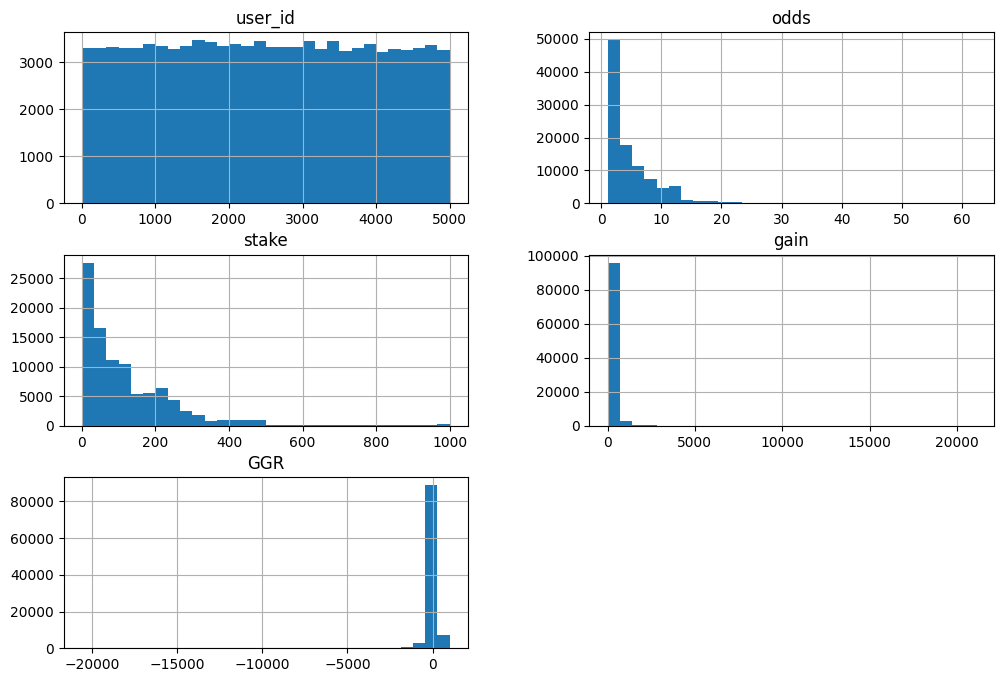

In [55]:
df.hist(bins=30, figsize=(12, 8))

#### So to assess risk, bets were grouped into three odds ranges: Low (<2), Medium (2-10), and High (>10)

In [60]:
def categorize_odds(odds):
    if odds < 2:
        return 'Low (<2)'
    elif 2 <= odds <= 10:
        return 'Medium (2-10)'
    elif odds > 10:
        return 'High (>10)'

df['odds_range'] = df.odds.apply(categorize_odds)
print(df.odds_range.value_counts())

odds_range
Medium (2-10)    52784
Low (<2)         35268
High (>10)       11948
Name: count, dtype: int64


#### Out of 100,000 bets, 35,268 fall in the Low range, 52,784 in the Medium range, and 11,948 in the High range. With these categories defined, two critical questions arise: how often do wins occur in each range, and what financial outcomes follow?

Win Rates by Odds Range (%):
odds_range
Low (<2)         66.000340
Medium (2-10)    23.296832
High (>10)        7.306662
Name: is_win, dtype: float64


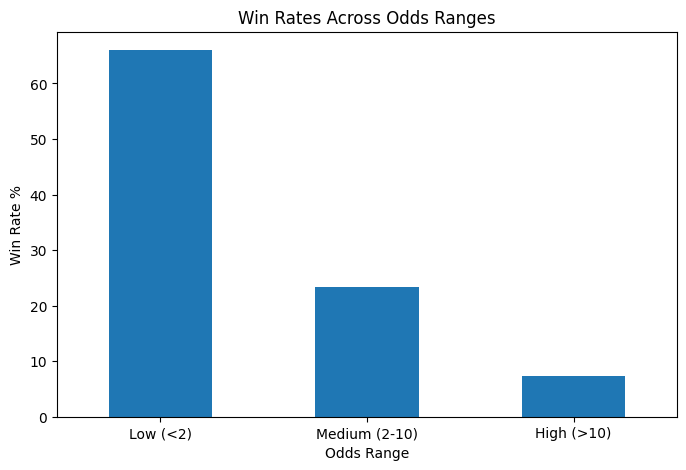

In [63]:
win_rates = df.groupby('odds_range')['is_win'].mean() * 100  
win_rates = win_rates.reindex(['Low (<2)', 'Medium (2-10)', 'High (>10)']) 
print("Win Rates by Odds Range (%):")
print(win_rates)

plt.figure(figsize=(8, 5))
win_rates.plot(kind='bar')
plt.xlabel('Odds Range')
plt.ylabel('Win Rate %')
plt.title('Win Rates Across Odds Ranges')
plt.xticks(rotation=0)
plt.show()

#### Low odds show a win rate of 66%, Medium drops to 23.30%, and High falls to 7.31%. This trend aligns with the nature of odds, Low odds such as 1.19, imply a high win probability around 84% but small payouts. High odds, like 62.15, suggest a mere 1.6% chance of winning, but a substantial payout if successful.

##### Implied Probability = 1 / Odds

Average Returns by Odds Range:
odds_range
Low (<2)        -23.848599
Medium (2-10)    -8.729370
High (>10)       -2.738745
Name: return, dtype: float64


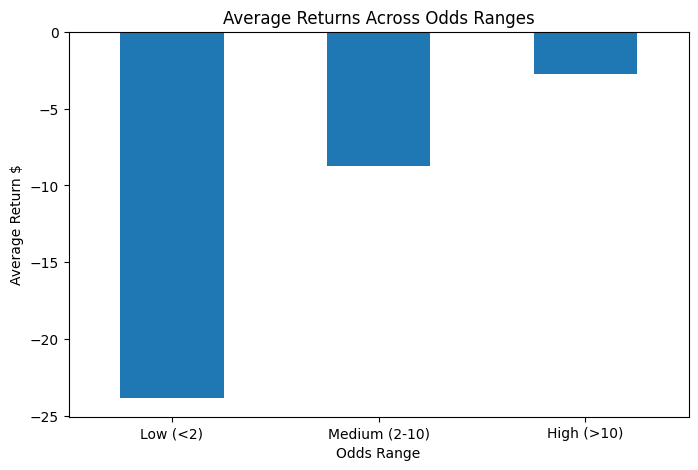

In [64]:
df['return'] = df.gain - df.stake
avg_returns = df.groupby('odds_range')['return'].mean()
avg_returns = avg_returns.reindex(['Low (<2)', 'Medium (2-10)', 'High (>10)'])
print("Average Returns by Odds Range:")
print(avg_returns)

plt.figure(figsize=(8, 5))
avg_returns.plot(kind='bar')
plt.xlabel('Odds Range')
plt.ylabel('Average Return $')
plt.title('Average Returns Across Odds Ranges')
plt.xticks(rotation=0)
plt.show()

#### Average return per bet (gain - stake) was computed for each odds range to reveal the financial outcomes. Low odds lose the most at -\$23.85 per bet, followed by Medium at -\$8.73, and High at just -\$2.74.

#### Let's analyze this further — Low-odds bets, win pretty often about two thirds of the times. But the winnings are small, betting \$100 might only get you \$50 more if you win, and you lose the whole \$100 if you don't. Even though these bets win a lot, you still end up losing about \$24 on average because the small wins don't make up for the losses. Medium odds bets, don't win as often only about one in four times, but when they do the payout is bigger, \$100 can turn into \$500, a \$400 gain. Still, with so many losses you're down around \$9 on average. High odds bets, almost never win only about one in 14 times but when they do, the payout is huge \$100 can become \$6,215, a \$6,115 gain. That's why these bets lose the least on average, just \$3, since those rare big wins help balance things out.

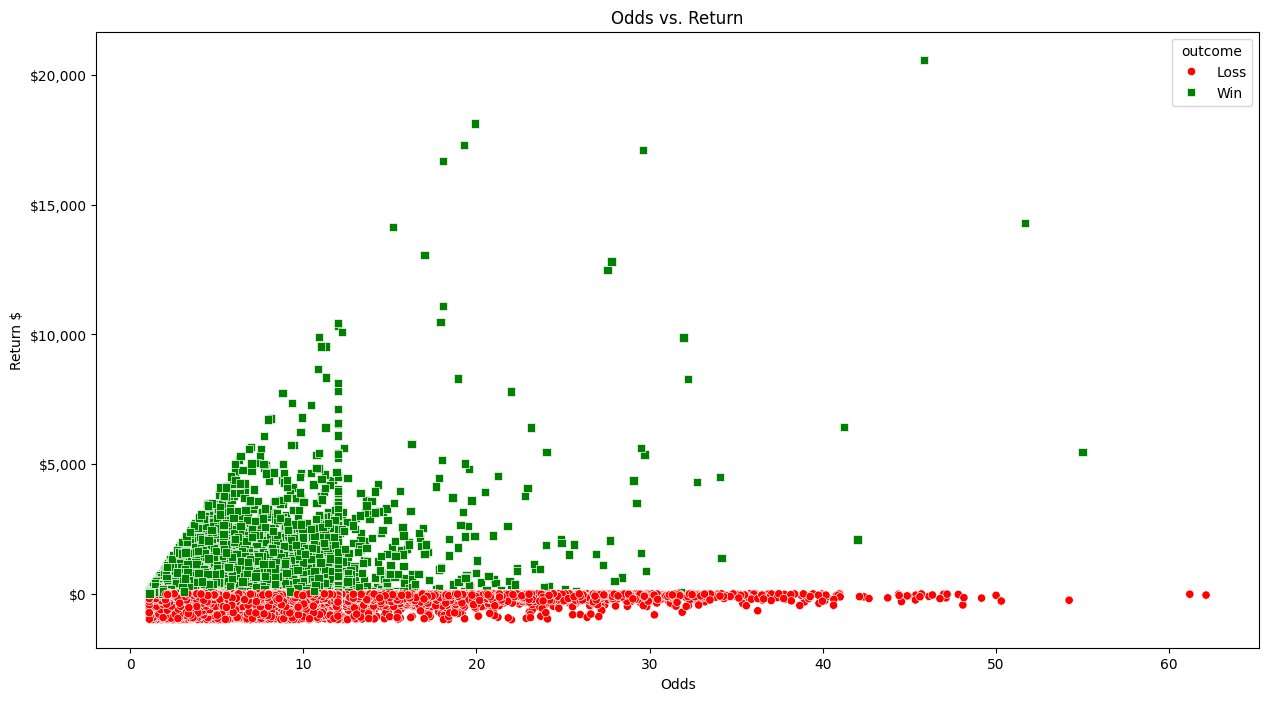

In [71]:
df['outcome'] = df['is_win'].map({False: 'Loss', True: 'Win'})

plt.figure(figsize=(15, 8))
sns.scatterplot(
    data=df, 
    x='odds', 
    y='return', 
    hue='outcome', 
    style='outcome', 
    palette={'Loss': 'red', 'Win': 'green'}, 
    markers={'Loss': 'o', 'Win': 's'}
)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.xlabel('Odds')
plt.ylabel('Return $')
plt.title('Odds vs. Return')
plt.show()

#### A scatterplot of odds vs. return, with losses as red circles and wins as green squares, paints a vivid picture. A dense cluster of red circles at about return 0 spans all odds, reflecting frequent losses. Green squares, representing wins, reach above $15,000, usually at higher odds. The plot is densest at odds 0-10 where 88% of bets reside, while points above 10 are sparse, matching the 11,948 high odds bets. This visual underscores the high risk, high reward nature of odds more than 10, where wins are rare, but when they do occur the payouts can be HUGE, explaining the smaller average loss in this range.


#### So are high risk bets worth it? For thrill seekers willing to endure frequent losses, high odds bets might appeal to them as they lose the least on average, and a single win can be a game changer. For those preferring consistency, low odds bets offer more wins, though the small payouts mean greater losses over time. Regardless of strategy, the data shows that bookmaker’s on average always have the edge, making consistent profits in betting a steep challenge.